In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/cognibot-official/data/master/train_data.csv")

In [3]:
df_raw.head()

,cement,blast,flyash,water,sp,ca,fa,age,strength
0,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7,24.00
1,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
2,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
3,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
4,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70


In [4]:
# Scoring function, we use rmse

def score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

In [5]:
# Extract the target variable from train dataset

y = df_raw['strength']
df_raw.drop('strength', axis=1, inplace=True)

In [6]:
df_raw.head()

,cement,blast,flyash,water,sp,ca,fa,age
0,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7
1,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28
2,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90
3,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91
4,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(df_raw, y, test_size=0.3, shuffle=True)


## Bagging

Trees have low bias inherently. Inorder to better model the dataset, we use RandomForests. This is a type of ensemble model - meaning it uses the result of many models to improve the final prediction.

This is done by bootstrapping and features sampling.

### Bootstrapping:

Bootstrapping in this context referes to the process of training many models on different subsets of the data (with resampling -ie replacement). The individual models are assumed to be of high variance which is the case in trees.

### Random feature subsampling:

Each model does not have access to all columns of the dataset (All variables of the input space). A fraction of it is made available and the selection process is random for each model.

The above methods maintain the same bias but reduce the variance


In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model3 = RandomForestRegressor(n_estimators=100, max_features=0.7, bootstrap=True, max_depth=10, min_samples_leaf=2, random_state=42)

In [10]:
%time model3.fit(X_train, y_train)

CPU times: user 262 ms, sys: 481 µs, total: 263 ms
Wall time: 277 ms


RandomForestRegressor(max_depth=10, max_features=0.7, min_samples_leaf=2,
                      random_state=42)

In [11]:
score(y_train, model3.predict(X_train))

3.2930596702096544

In [12]:
score(y_valid, model3.predict(X_valid))

5.218312145363248

In [13]:
# Decision tree regressor

model2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=42)
model2.fit(X_train, y_train)
print("Train score: ", score(y_train, model2.predict(X_train)))
print("Validation score: ", score(y_valid, model2.predict(X_valid)))

Train score:  2.776560142954293
Validation score:  7.074520846526166




As you can see, it has worse score on train dataset and better score on validation dataset compared to Decision tree regresser using the same parameters


## Visualizing bagging


In [14]:
# Collect the prediction from different trees in the forest

preds = np.stack([t.predict(X_valid) for t in model3.estimators_])

In [15]:
preds.shape

(100, 217)

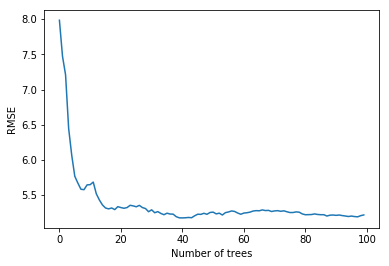

In [16]:
# Plot metric vs number of trees

from matplotlib import pyplot as plt
plt.plot([sqrt(mean_squared_error(y_valid, np.mean(preds[:i+1], axis=0))) for i in range(100)])
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.show()